# Automatic Refinement of Elements in Doped 2D Material

In this notebook we'll look at the <b>Model Refiner</b> Class.
Using Atomap sublattices it allows you to:
1. Refine the elements in the sublattice
2. Construct a 3D model of the elements and
3. Simulate the atomic model with fast image simulation software (PyPrismatic)

In [10]:
%matplotlib nbagg
from temul.model_refiner import Model_Refiner
import atomap.api as am
import temul.example_data as example_data
from ase.visualize import view
from ase.io import read, write

In [2]:
s_original = example_data.load_Se_implanted_MoS2_data()
real_sampling = s_original.axes_manager[-1].scale
image_size_z_nm = 1.2294 / 2

atom_lattice = am.load_atom_lattice_from_hdf5('Atom_Lattice_max.hdf5')
sub1 = atom_lattice.sublattice_list[0]
sub2 = atom_lattice.sublattice_list[1]
sub3 = atom_lattice.sublattice_list[2]

''' Sublattice elements '''
element_list_sub1 = ['Mo_0', 'Mo_1', 'Mo_1.S_1', 'Mo_1.Se_1', 'Mo_2']
element_list_sub2 = ['S_0', 'S_1', 'S_2', 'Se_1', 'Se_1.S_1', 'Se_2']
element_list_sub3 = ['H_0', 'S_1', 'Se_1', 'Mo_1', ]

sub_dict = {sub1: element_list_sub1,
            sub2: element_list_sub2,
            sub3: element_list_sub3}

## Create the Model Refiner object

In [3]:
refiner = Model_Refiner(sub_dict,
                        sampling=real_sampling * 10,
                        thickness=image_size_z_nm * 10,
                        name='Se Implanted MoS2')

In [4]:
import matplotlib.pyplot as plt

def show_exp_and_sim():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(refiner.reference_image.data)
    ax2.imshow(refiner.comparison_image.data)
    ax1.set_title('Experiment')
    ax2.set_title('Simulation')
    plt.show()

## What is in the Model Refiner

In [5]:
refiner.get_element_count_as_dataframe()

,H_0,Mo_0,Mo_1,Mo_1.S_1,Mo_1.Se_1,Mo_2,S_0,S_1,S_2,Se_1,Se_1.S_1,Se_2
0 Initial State,351.0,0.0,375.0,9.0,0.0,0.0,0.0,8.0,331.0,7.0,8.0,0.0


<IPython.core.display.Javascript object>


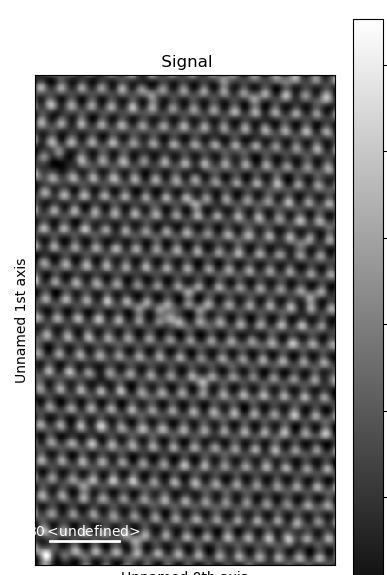

<IPython.core.display.Javascript object>


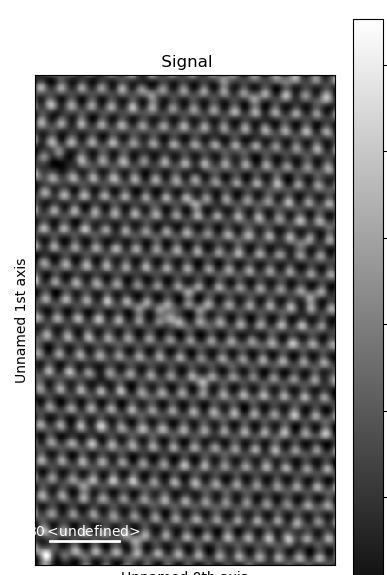

<IPython.core.display.Javascript object>


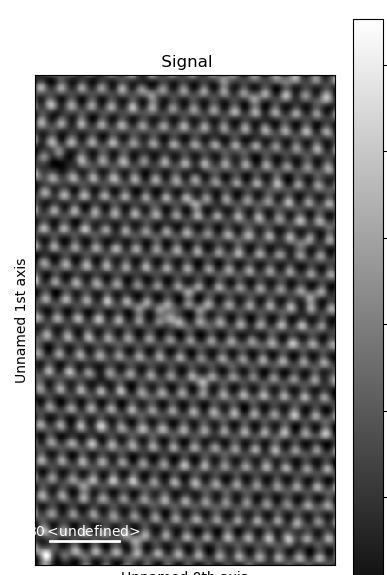

In [6]:
for sub in refiner.sublattice_list:
    sub.plot()

<IPython.core.display.Javascript object>


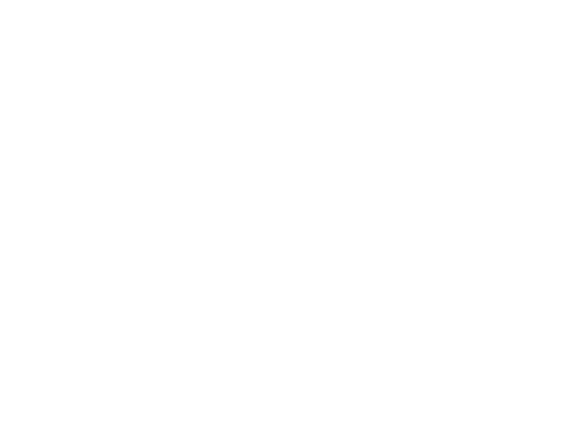

In [7]:
refiner.plot_element_count_as_bar_chart(2)

---------------
## Calibrate the Model Refiner

<IPython.core.display.Javascript object>


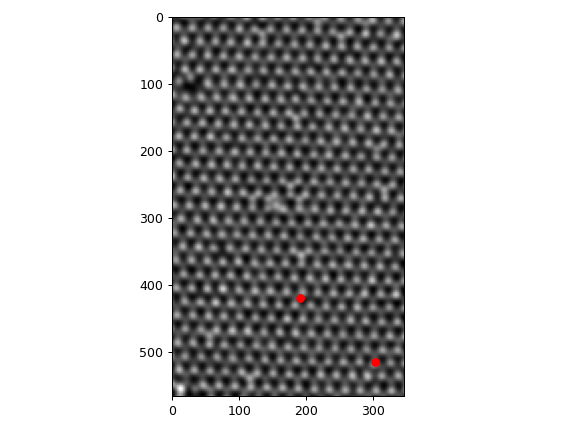

In [14]:
refiner.set_calibration_separation(11)
refiner.set_calibration_area()

<IPython.core.display.Javascript object>


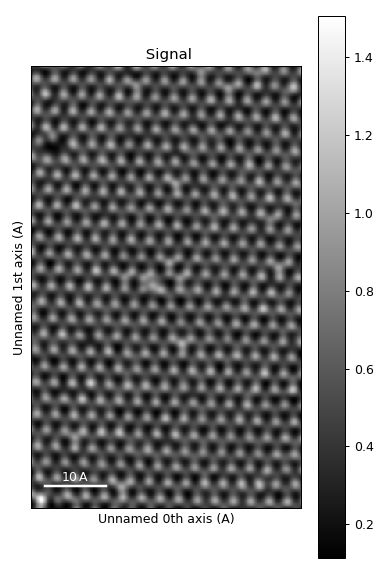

In [11]:
refiner.reference_image.plot()
cif_model = read('cif_filename.cif')
view(cif_model)

------------
## Simulate the Model Refiner

### Very fast simulation


In [15]:
from time import time
t0 = time()
refiner.create_simulation(sublattices='all',
                          filter_image=False,
                          calibrate_image=True,
                          filename='sim', probeStep=None,
                          interpolationFactor=100,
                          percent_to_nn=None,
                          mask_radius=2)
t1 = time() - t0
print("Time for simulation: {:.3f} s".format(t1))

C:\Users\Eoghan.OConnell\AppData\Local\Continuum\anaconda3\lib\site-packages\hyperspy\component.py:557: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])


Time for simulation: 7.682 s


<IPython.core.display.Javascript object>


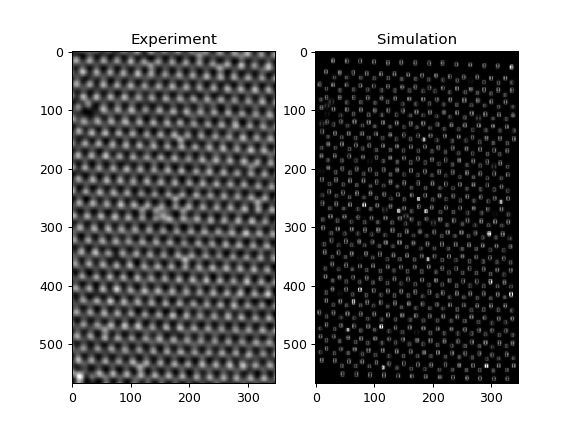

In [16]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')

### More accurate simulation


In [17]:
t0 = time()
refiner.create_simulation(sublattices='all',
                          filter_image=False,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)
t1 = time() - t0
print("Time for simulation: {:.3f} s".format(t1))

C:\Users\Eoghan.OConnell\AppData\Local\Continuum\anaconda3\lib\site-packages\hyperspy\component.py:557: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])


Time for simulation: 17.374 s


<IPython.core.display.Javascript object>


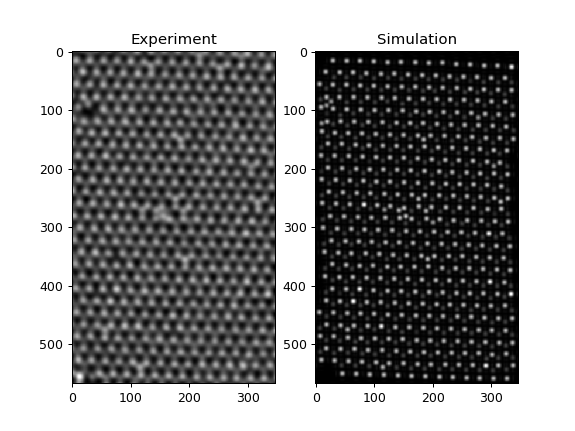

In [18]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')

### Autofiltered simulation


In [19]:
refiner.create_simulation(sublattices='all',
                          filter_image=True,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)

C:\Users\Eoghan.OConnell\AppData\Local\Continuum\anaconda3\lib\site-packages\hyperspy\component.py:557: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])


<IPython.core.display.Javascript object>


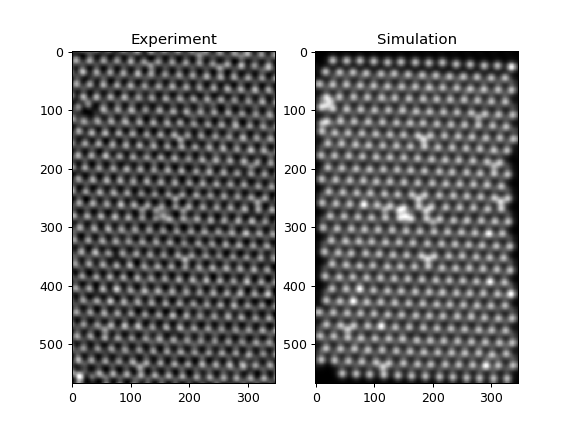

In [20]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')

----------
# Refine the Atoms with Image Intensity

In [21]:
for i in range(2):
    refiner.image_difference_intensity_model_refiner()
    refiner.create_simulation(sublattices='all',
                          filter_image=True,
                          calibrate_image=True,
                          filename='', probeStep=None,
                          interpolationFactor=16,
                          percent_to_nn=None,
                          mask_radius=2)

# refiner.image_difference_intensity_model_refiner()

Changing some atoms
Changing some atoms
Changing some atoms
Changing some atoms


C:\Users\Eoghan.OConnell\AppData\Local\Continuum\anaconda3\lib\site-packages\hyperspy\component.py:557: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])


Changing some atoms
Changing some atoms


In [22]:
refiner.get_element_count_as_dataframe()

,H_0,Mo_0,Mo_1,Mo_1.S_1,Mo_1.Se_1,Mo_2,S_0,S_1,S_2,Se_1,Se_1.S_1,Se_2
0 Initial State,351.0,0.0,375.0,9.0,0.0,0.0,0.0,8.0,331.0,7.0,8.0,0.0
1 Intensity,350.0,2.0,372.0,9.0,0.0,0.0,0.0,10.0,332.0,7.0,7.0,0.0
2 Intensity,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0


-----------------------------------------------
# Refine by finding new Atoms

In [23]:
refiner.image_difference_position_model_refiner(
    sublattices='all', pixel_threshold=20, num_peaks=10)
refiner.image_difference_intensity_model_refiner()

3 new atoms found! Adding new atom positions.
No New Atoms
No New Atoms
Changing some atoms
Changing some atoms


In [24]:
refiner.get_element_count_as_dataframe()

,H_0,Mo_0,Mo_1,Mo_1.S_1,Mo_1.Se_1,Mo_2,S_0,S_1,S_2,Se_1,Se_1.S_1,Se_2,
0 Initial State,351.0,0.0,375.0,9.0,0.0,0.0,0.0,8.0,331.0,7.0,8.0,0.0,0.0
1 Intensity,350.0,2.0,372.0,9.0,0.0,0.0,0.0,10.0,332.0,7.0,7.0,0.0,0.0
2 Intensity,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,0.0
3 Position,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,3.0
4 Intensity,350.0,1.0,373.0,12.0,0.0,0.0,0.0,11.0,332.0,7.0,6.0,0.0,0.0


<IPython.core.display.Javascript object>


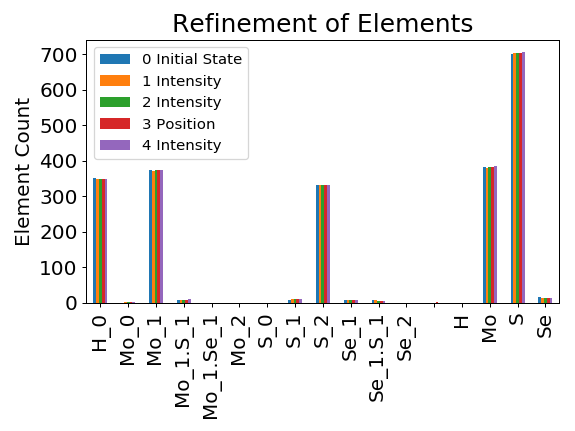

In [25]:
refiner.plot_element_count_as_bar_chart(2)

-------------
# Revert to previous version

In [26]:
refiner.image_difference_intensity_model_refiner()
refiner.get_element_count_as_dataframe()

Changing some atoms
Changing some atoms


,H_0,Mo_0,Mo_1,Mo_1.S_1,Mo_1.Se_1,Mo_2,S_0,S_1,S_2,Se_1,Se_1.S_1,Se_2,
0 Initial State,351.0,0.0,375.0,9.0,0.0,0.0,0.0,8.0,331.0,7.0,8.0,0.0,0.0
1 Intensity,350.0,2.0,372.0,9.0,0.0,0.0,0.0,10.0,332.0,7.0,7.0,0.0,0.0
2 Intensity,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,0.0
3 Position,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,3.0
4 Intensity,350.0,1.0,373.0,12.0,0.0,0.0,0.0,11.0,332.0,7.0,6.0,0.0,0.0
5 Intensity,351.0,1.0,373.0,9.0,3.0,0.0,0.0,10.0,332.0,7.0,6.0,0.0,0.0


In [27]:
refiner = refiner.previous_refiner_instance

In [28]:
refiner.get_element_count_as_dataframe()

,H_0,Mo_0,Mo_1,Mo_1.S_1,Mo_1.Se_1,Mo_2,S_0,S_1,S_2,Se_1,Se_1.S_1,Se_2,
0 Initial State,351.0,0.0,375.0,9.0,0.0,0.0,0.0,8.0,331.0,7.0,8.0,0.0,0.0
1 Intensity,350.0,2.0,372.0,9.0,0.0,0.0,0.0,10.0,332.0,7.0,7.0,0.0,0.0
2 Intensity,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,0.0
3 Position,350.0,1.0,373.0,9.0,0.0,0.0,0.0,10.0,332.0,8.0,6.0,0.0,3.0
4 Intensity,350.0,1.0,373.0,12.0,0.0,0.0,0.0,11.0,332.0,7.0,6.0,0.0,0.0


---------------------
# Accuracy of Simulation

<IPython.core.display.Javascript object>


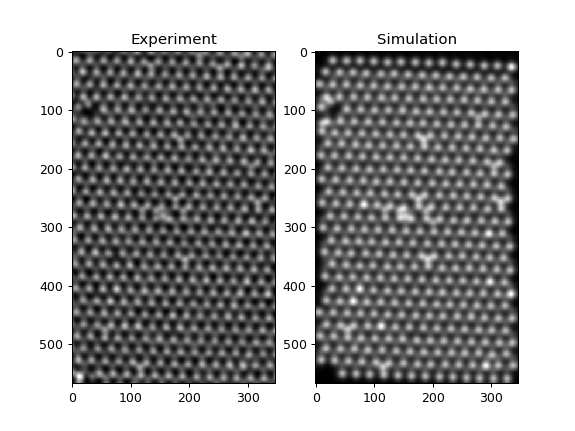

In [29]:
refiner.plot_reference_and_comparison_images('Experiment', 'Simulation')

<IPython.core.display.Javascript object>


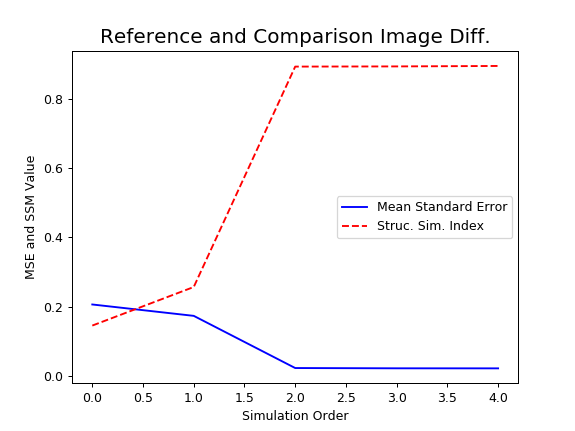

In [30]:
refiner.plot_error_between_comparison_and_reference_image()
plt.legend(loc=7)
# refiner.plot_error_between_comparison_and_reference_image(style='scatter')